# 인공신경망
실제 인간의 뇌에서 수행되는 신경망 방식을 사용한 컴퓨터 연산 방법   
실제 뇌에서 뉴런간 정보 전달 방식을 모델링한 것

## 퍼셉트론
신경망의 한 종류   

입력값 X 를 가중치와 곱해서 모두 더한 값이 임계값 기준이 있는 노드

In [1]:
import pandas as pd
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

In [2]:
data

,x1,x2,y
0,True,True,False
1,True,False,True
2,True,False,True
3,True,True,False
4,True,True,False
...,...,...,...
995,True,True,False
996,True,True,False
997,False,True,True
998,False,False,False


In [3]:
!pip install torch

In [4]:
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:, 0].values
        self.x2 = df.iloc[:,1].values
        self.y = df.iloc[:,2].values
        self.length = len(df)
    
    def __getitem__(self, index):
        x = torch.FloatTensor([self.x1[index], self.x2[index]])
        y = torch.FloatTensor([self.y[index]])
        return x,y

    def __len__(self):
        return self.length


class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()

        self.layer = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layer(x)
        return x

train_dataset = CustomDataset('data.csv')
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(5000):
    cost = 0.0
    for x,y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost/len(train_dataloader)

    if (epoch + 1) % 1000 ==0:
        print(f'Epoch : {epoch+1:4d}, Cost : {cost:.3f}')

with torch.no_grad():
    model.eval()
    input = torch.FloatTensor([
        [0,0],
        [0,1],
        [1,0],
        [1,1]
    ]).to(device)
    
    outputs = model(input)

print(outputs)

cpu


C:\Users\user\AppData\Local\Temp\ipykernel_16048\2109181045.py:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x = torch.FloatTensor([self.x1[index], self.x2[index]])
C:\Users\user\AppData\Local\Temp\ipykernel_16048\2109181045.py:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch : 1000, Cost : 0.692
Epoch : 2000, Cost : 0.692
Epoch : 3000, Cost : 0.692
Epoch : 4000, Cost : 0.692
Epoch : 5000, Cost : 0.693
tensor([[0.4678],
        [0.5004],
        [0.5037],
        [0.5364]])


In [5]:
class fruit():
    def __init__(self) -> None:
        self._cnt = 0
        self._name = []

    def add_fruit(self, name, size):
        self._name.append(name)
        self._cnt += 1
        return True

    def set_fruit(self, new_name):
        self._name = new_name

    def get_item(self):
        return self._name

    def __len__(self):
        return self._cnt

In [6]:
fruit_class = fruit()

In [7]:
fruit_class.add_fruit('apple',10)
fruit_class.add_fruit('banana',10)
fruit_class.add_fruit('orange',10)

True

In [8]:
len(fruit_class)

3

In [9]:
dir(fruit_class)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cnt',
 '_name',
 'add_fruit',
 'get_item',
 'set_fruit']

In [10]:
fruit_class.get_item()

['apple', 'banana', 'orange']

In [11]:
fruit_class.name = ['1','2','3']

In [12]:
fruit_class.name

['1', '2', '3']

### 다층퍼셉트론 모델

In [13]:
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:, 0].values
        self.x2 = df.iloc[:,1].values
        self.y = df.iloc[:,2].values
        self.length = len(df)

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x1[index], self.x2[index]])
        y = torch.FloatTensor([self.y[index]])
        return x,y

    def __len__(self):
        return self.length


class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(2,2),
            nn.Sigmoid()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

train_dataset = CustomDataset('data.csv')
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(5000):
    cost = 0.0
    for x,y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost/len(train_dataloader)

    if (epoch + 1) % 1000 ==0:
        print(f'Epoch : {epoch+1:4d}, Cost : {cost:.3f}')

with torch.no_grad():
    model.eval()
    input = torch.FloatTensor([
          [0,0],
          [0,1],
          [1,0],
          [1,1]
      ]).to(device)

    outputs = model(input)

print(outputs)
print(outputs<=0.5)

cpu


C:\Users\user\AppData\Local\Temp\ipykernel_16048\289825597.py:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x = torch.FloatTensor([self.x1[index], self.x2[index]])
C:\Users\user\AppData\Local\Temp\ipykernel_16048\289825597.py:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch : 1000, Cost : 0.693
Epoch : 2000, Cost : 0.693
Epoch : 3000, Cost : 0.693
Epoch : 4000, Cost : 0.693
Epoch : 5000, Cost : 0.690
tensor([[0.4655],
        [0.5090],
        [0.4959],
        [0.5358]])
tensor([[ True],
        [False],
        [ True],
        [False]])


C:\Users\user\AppData\Local\Temp\ipykernel_10256\3535028305.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x >0, dtype=np.int)


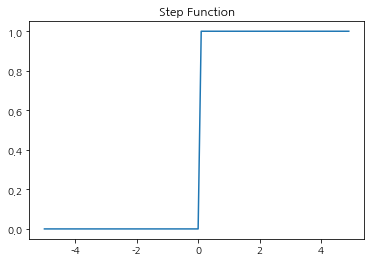

In [2]:
def step(x):
    return np.array(x >0, dtype=np.int)

x = np.arange(-5.0,5.0,0.1)
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

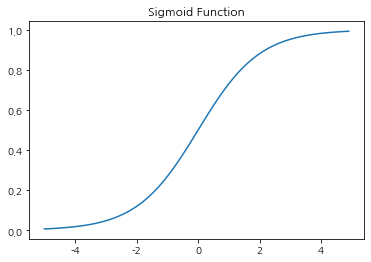

In [3]:
# 시크모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.title('Sigmoid Function')
plt.show()

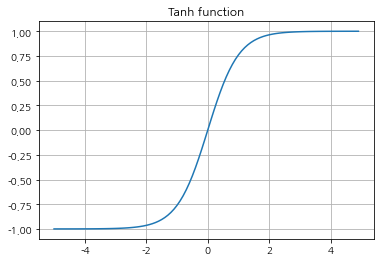

In [4]:
x = np.arange(-5.0,5.0,0.1)
y = np.tanh(x)
plt.plot(x,y)
plt.grid()
plt.title('Tanh function')
plt.show()

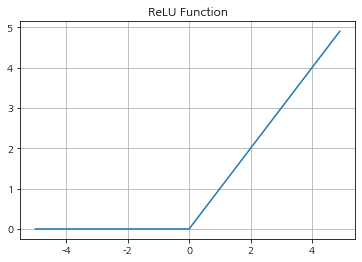

In [5]:
# ReLU
def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x,relu(x))
plt.grid()
plt.title('ReLU Function')
plt.show()

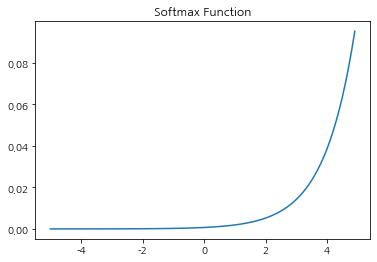

In [6]:
# Softmax
x = np.arange(-5.0,5.0,0.1)
y = np.exp(x)/np.sum(np.exp(x))

plt.plot(x,y)
plt.title('Softmax Function')
plt.show()